<h1><strong>Machine learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor

<h4>Cargamos los datos. <br>
Tenemos que tener en cuenta que estamos buscando un modelo de regresión, y como ya hemos visto, nuestra variable a predecir (Precio) tiene una distribución normal, lo cual es óptimo para una regresión.

In [2]:
df = pd.read_json('../Data/processed/data_ml.json')
df.head()

,Año,Kilómetros,Cilindrada,Potencia (cv),Consumo l/100,Precio,Marca_Gama alta,Marca_Gama lujo,Marca_Gama media,Combustible_Diésel,Combustible_GLP,Combustible_Gasolina,Combustible_Híbrido,Transmisión_Automática,Transmisión_Manual
0,2019,47413,1600,117,6.6,18990,0,0,1,0,0,1,0,0,1
1,2019,40800,2100,136,5.3,21990,1,0,0,1,0,0,0,1,0
2,2019,62122,900,90,5.4,12990,0,0,1,0,0,1,0,0,1
3,2022,5338,1500,150,5.7,20490,0,0,1,0,0,1,0,0,1
4,2021,58885,1500,110,3.6,14490,0,0,1,1,0,0,0,0,1


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Año,4803.0,2017.962315,2.254810,2009.0,2016.0,2019.0,2020.0,2023.0
Kilómetros,4803.0,69506.474703,40708.458689,20.0,37467.5,63158.0,97773.5,193045.0
Cilindrada,4803.0,1544.638767,418.319920,900.0,1200.0,1500.0,2000.0,5000.0
Potencia (cv),4803.0,129.372892,42.684763,60.0,100.0,121.0,150.0,510.0
Consumo l/100,4803.0,4.997148,1.015163,1.2,4.3,4.9,5.5,12.6
Precio,4803.0,17035.785759,6246.842641,5490.0,12490.0,15990.0,20490.0,55900.0
Marca_Gama alta,4803.0,0.289819,0.453725,0.0,0.0,0.0,1.0,1.0
Marca_Gama lujo,4803.0,0.001666,0.040782,0.0,0.0,0.0,0.0,1.0
Marca_Gama media,4803.0,0.708516,0.454493,0.0,0.0,1.0,1.0,1.0
Combustible_Diésel,4803.0,0.472829,0.499313,0.0,0.0,0.0,1.0,1.0


<h4>La varianza de los datos es alta y no conviene, por lo que realizamos un escalado para equilibrar los pesos de nuestro modelo:

<h4>Separamos ya nuestra variable a predecir (Precio) para no confundirnos.

In [3]:
target = df.iloc[:, 5]
target

0       18990
1       21990
2       12990
3       20490
4       14490
        ...  
4803     7990
4804    19390
4805    19990
4806     9990
4807    43990
Name: Precio, Length: 4803, dtype: int64

<h4>Estudiamos un poco la variable a predecir, comparándola con la distribución cuadrática y distribución logarítmica

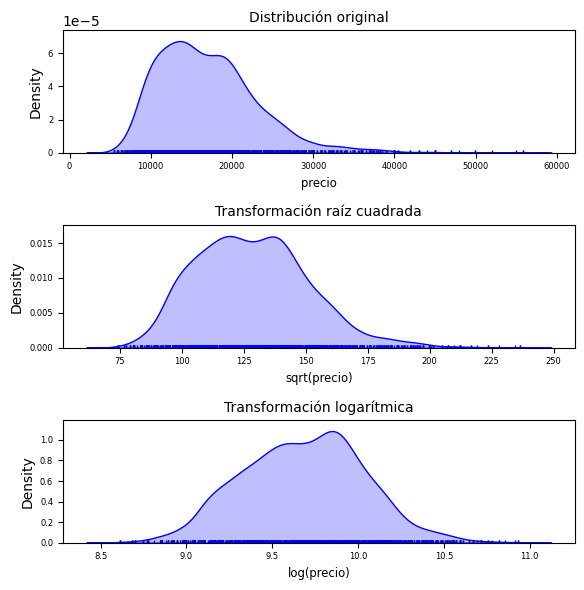

In [5]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 6))
sns.kdeplot(
    target,
    fill    = True,
    color   = "blue",
    ax      = axes[0]
)
sns.rugplot(
    target,
    color   = "blue",
    ax      = axes[0]
)
axes[0].set_title("Distribución original", fontsize = 'medium')
axes[0].set_xlabel('precio', fontsize='small') 
axes[0].tick_params(labelsize = 6)

sns.kdeplot(
    np.sqrt(target),
    fill    = True,
    color   = "blue",
    ax      = axes[1]
)
sns.rugplot(
    np.sqrt(target),
    color   = "blue",
    ax      = axes[1]
)
axes[1].set_title("Transformación raíz cuadrada", fontsize = 'medium')
axes[1].set_xlabel('sqrt(precio)', fontsize='small') 
axes[1].tick_params(labelsize = 6)

sns.kdeplot(
    np.log(target),
    fill    = True,
    color   = "blue",
    ax      = axes[2]
)
sns.rugplot(
    np.log(target),
    color   = "blue",
    ax      = axes[2]
)
axes[2].set_title("Transformación logarítmica", fontsize = 'medium')
axes[2].set_xlabel('log(precio)', fontsize='small') 
axes[2].tick_params(labelsize = 6)

fig.tight_layout()

In [ ]:
# from fitter import Fitter
# distribuciones = ['cauchy', 'chi2', 'expon',  'exponpow', 'gamma',
#                   'norm', 'powerlaw', 'beta', 'logistic']

# fitter = Fitter(target, distributions=distribuciones)
# fitter.fit()
# fitter.summary(Nbest=10)

<h4>Vamos a ver la distribución de las variables númericas que tenemos:

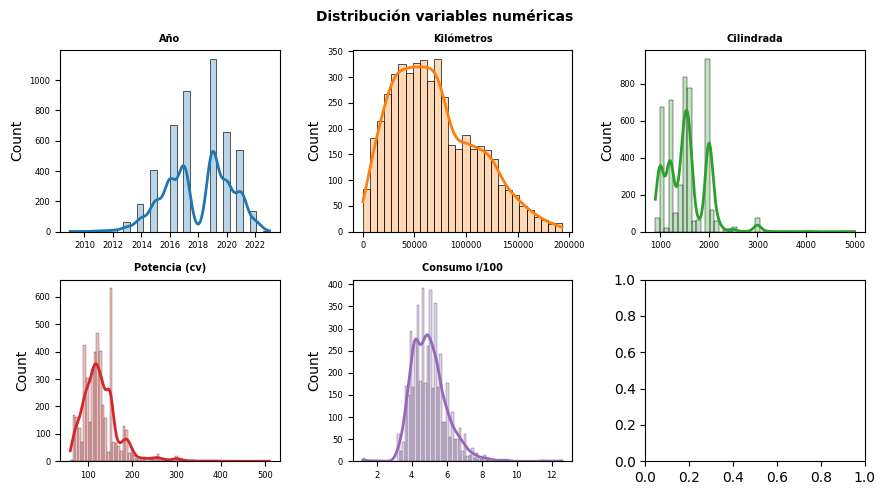

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(9, 5))
axes = axes.flat
col_num = df.iloc[:, :5].columns

for i, colum in enumerate(col_num):
    sns.histplot(
        data     = df,
        x        = colum,
        stat     = "count",
        kde      = True,
        color    = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws = {'linewidth': 2},
        alpha    = 0.3,
        ax       = axes[i]
    )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

<h4>Ahora correlacionamos las variables con el target, el Precio:

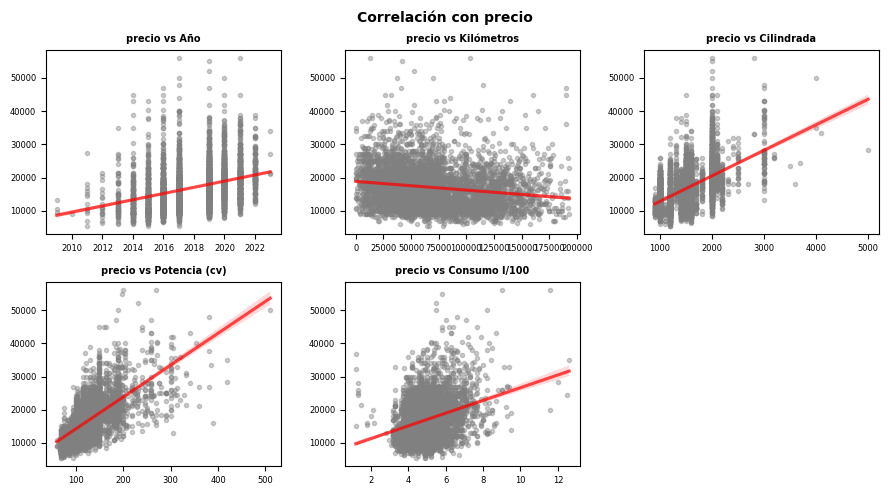

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(9, 5))
axes = axes.flat
col_num = df.iloc[:, :5].columns

for i, colum in enumerate(col_num):
    sns.regplot(
        x           = df[colum],
        y           = df['Precio'],
        color       = "gray",
        marker      = '.',
        scatter_kws = {"alpha":0.4},
        line_kws    = {"color":"r","alpha":0.7},
        ax          = axes[i]
    )
    axes[i].set_title(f"precio vs {colum}", fontsize = 7, fontweight = "bold")
    # axes[i].ticklabel_format(style='sci', scilimits=(-4,4), axis='both')
    # axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    # axes[i].xaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")


for i in [5]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Correlación con precio', fontsize = 10, fontweight = "bold");

<h4>Recordemos que la cilindrada y la potencia tenían una alta correlación.

In [4]:
cols_name = df.drop('Precio',axis=1).columns
df_2 = df.iloc[:, :5]
scaler = StandardScaler()
scaler.fit(df_2)

StandardScaler()

In [5]:
data_scaled = scaler.transform(df_2)
data_scaled

array([[ 0.46025729, -0.54278093,  0.13235563, -0.28989689,  1.57907552],
       [ 0.46025729, -0.70524565,  1.32773753,  0.15527316,  0.29835984],
       [ 0.46025729, -0.18141791, -1.54117902, -0.92250697,  0.39687643],
       ...,
       [-1.75745516,  0.99973724,  1.56681391,  0.4832932 ,  0.98797598],
       [-0.87037018,  0.3092683 , -0.82394989, -1.41453703, -0.09570652],
       [-0.42682769,  0.38044028,  1.08866115,  2.59199345,  0.7909428 ]])

In [6]:
dummie_data = np.array(df.iloc[:, 6:])
data = np.concatenate((data_scaled, dummie_data), axis=1)
data.shape

(4803, 14)

In [7]:
target.shape

(4803,)

In [8]:
data = pd.DataFrame(data, columns= ['year','km','cc','cv','consum','high','luxe','mid','diesel','glp','gasol','hybrid','auto','manual'])
data

,year,km,cc,cv,consum,high,luxe,mid,diesel,glp,gasol,hybrid,auto,manual
0,0.460257,-0.542781,0.132356,-0.289897,1.579076,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.460257,-0.705246,1.327738,0.155273,0.298360,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.460257,-0.181418,-1.541179,-0.922507,0.396876,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1.790885,-1.576458,-0.106721,0.483293,0.692426,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1.347342,-0.260943,-0.106721,-0.453907,-1.376422,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,-1.313913,0.663163,-1.302103,-1.367677,-0.785323,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4799,-2.644540,2.492457,1.088661,0.951893,0.889459,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4800,-1.757455,0.999737,1.566814,0.483293,0.987976,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4801,-0.870370,0.309268,-0.823950,-1.414537,-0.095707,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


<h4>Ahora dividimos nuestro dataset en los datos para entrenar el modelo y los datos para probar que funciona:

In [9]:
data_train, data_test, target_train, target_test = train_test_split(
    data,
    target,
    test_size= 0.2,
    random_state= 42
)

<h3>Vamos a iniciar el primer modelo con un random forest y ver que sacamos:

In [64]:
randfor = RandomForestRegressor(
    n_estimators= 200,
    max_depth= 15,
    max_features= 0.3,
    min_samples_leaf= 3,
    random_state= 42
)

In [65]:
randfor.fit(data_train, target_train)

RandomForestRegressor(max_depth=15, max_features=0.3, min_samples_leaf=3,
                      n_estimators=200, random_state=42)

In [24]:
randfor.feature_importances_

array([1.35207422e-01, 9.60863891e-02, 1.18758406e-01, 2.89375852e-01,
       8.03304523e-02, 4.33326668e-02, 6.90701578e-04, 5.56265121e-02,
       7.95753906e-03, 2.00951792e-04, 9.60187982e-03, 5.44067734e-03,
       7.88997919e-02, 7.84907589e-02])

In [66]:
randfor.score(data_train, target_train)

0.8441123118047527

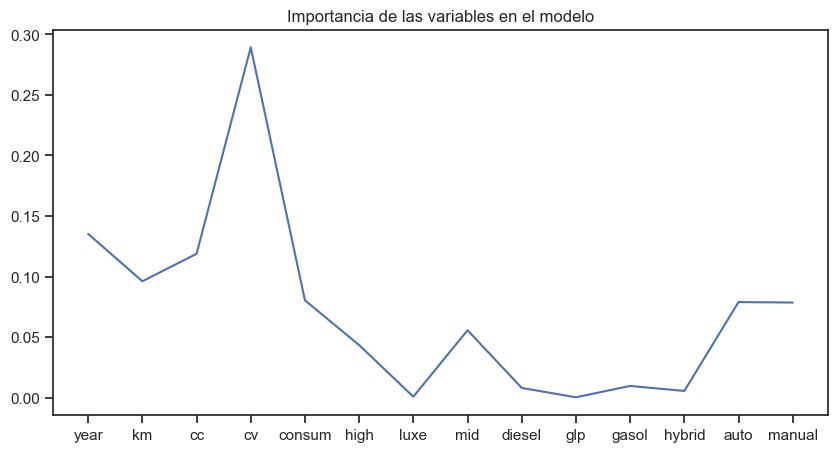

In [126]:
plt.figure(figsize=(10,5))
plt.plot(randfor.feature_names_in_, randfor.feature_importances_)
plt.title('Importancia de las variables en el modelo');

In [67]:
predicted = randfor.predict(data_test)
pd.DataFrame(data= {'predicted':predicted, 'real':target_test, 'error':(abs(target_test-predicted))}).head(10)

,predicted,real,error
596,19198.070204,20990,1791.929796
3374,14773.710758,13990,783.710758
2704,9999.877331,8990,1009.877331
2475,19444.844490,25490,6045.155510
8,13689.265803,13990,300.734197
577,20811.528929,17990,2821.528929
3174,11749.231536,12490,740.768464
812,11275.747494,9990,1285.747494
2078,19841.780894,17190,2651.780894
4035,17132.375703,18990,1857.624297


In [68]:
print('MSE: ', mean_squared_error(target_test, predicted))
print('RMSE: ', mean_squared_error(target_test, predicted, squared=False))
print('MAE: ', mean_absolute_error(target_test, predicted))
print('R2 score: ', r2_score(target_test, predicted))

MSE:  11665625.060850836
RMSE:  3415.4977764376945
MAE:  2374.0857416788335
R2 score:  0.7125894038871379


<h4> RFR con n_estimators= 100, max_depth= 5, min_samples_leaf= 3: <br>
MSE:  13923657.386464108 <br>
RMSE:  3731.4417302785405 <br>
MAE:  2647.843796463283 <br>
R2 score:  0.6487331221382951

<h4> RFR con n_estimators= 200, max_depth= 15, min_samples_leaf= 3: <br>
MSE:  11858991.504355298 <br>
RMSE:  3443.6886479987265 <br>
MAE:  2399.8196457364184 <br>
R2 score:  0.7008206389527347

<h4> RFR con n_estimators= 200, max_depth= 15, max_features= 0.3, min_samples_leaf= 3: <br>
MSE:  11665625.060850836 <br>
RMSE:  3415.4977764376945 <br>
MAE:  2374.0857416788335 <br>
R2 score:  0.7125894038871379

<h4>Para la última prueba, hemos intentado que generalice mejor, para ello se bloquean algunas variables aleatoriamente, así vemos si disminuye la importancia de 'cv' y aprende a predecir con las otras. También se ha aumentado el tamaño de train (75% a 80%) y reducido en test (25% a 20%).

In [49]:
joblib.dump(randfor, '../Models/model_rf.pkl')

['../Models/model_rf.pkl']

<h4>No parece que vayamos a sacar mucho más de este modelo, por lo que vamos a probar con otro:

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression

<h4>Vamos a intentar mejorar el RandomForest con un grid search:

In [69]:
rf = RandomForestRegressor(random_state= 42)
grid_rf = GridSearchCV(
    estimator= rf,
    param_grid= {
        'n_estimators': [100,150,200,250,300],
        'max_depth': [5,10,15,20],
        'max_features': [0.2,0.3,0.4],
        'min_samples_leaf': [3,5,10,15]
        }
)

In [70]:
grid_rf.fit(data_train, target_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'max_features': [0.2, 0.3, 0.4],
                         'min_samples_leaf': [3, 5, 10, 15],
                         'n_estimators': [100, 150, 200, 250, 300]})

In [71]:
grid_rf.best_params_

{'max_depth': 20,
 'max_features': 0.4,
 'min_samples_leaf': 3,
 'n_estimators': 300}

In [72]:
grid_rf.best_score_

0.7305364239836688

In [73]:
predicted_2 = grid_rf.predict(data_test)
pd.DataFrame(data= {'predicted':predicted_2, 'real':target_test, 'error':(abs(target_test-predicted_2))}).head(10)

,predicted,real,error
596,19344.726097,20990,1645.273903
3374,14424.909122,13990,434.909122
2704,9988.436531,8990,998.436531
2475,19162.834185,25490,6327.165815
8,13991.211911,13990,1.211911
577,20764.591003,17990,2774.591003
3174,11793.216062,12490,696.783938
812,11368.459426,9990,1378.459426
2078,19898.417652,17190,2708.417652
4035,17289.347255,18990,1700.652745


In [74]:
print('MSE: ', mean_squared_error(target_test, predicted_2))
print('RMSE: ', mean_squared_error(target_test, predicted_2, squared=False))
print('MAE: ', mean_absolute_error(target_test, predicted_2))
print('R2 score: ', r2_score(target_test, predicted_2))

MSE:  11638440.024771513
RMSE:  3411.515795767552
MAE:  2370.7003259366807
R2 score:  0.7132591723208181


In [40]:
joblib.dump(grid_rf, '../Models/model_grid_rf.pkl')

['../Models/model_grid_rf.pkl']

<h4>Ahora probemos el mismo ensamble pero con un GradientBoosting:

In [12]:
gbr = GradientBoostingRegressor(random_state= 42)

In [13]:
grid_gbr = GridSearchCV(
    estimator= gbr,
    param_grid= {
        'learning_rate': [0.01,0.1,0.5,1],
        'n_estimators': [100,200,300],
        'min_samples_leaf': [3,5,10],
        'max_depth': [10,15,20,25],
        'max_features': [0.3,0.4]
        }
)

In [14]:
grid_gbr.fit(data_train, target_train)

GridSearchCV(estimator=GradientBoostingRegressor(random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 0.5, 1],
                         'max_depth': [10, 15, 20, 25],
                         'max_features': [0.3, 0.4],
                         'min_samples_leaf': [3, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [15]:
grid_gbr.best_params_

{'learning_rate': 0.01,
 'max_depth': 15,
 'max_features': 0.3,
 'min_samples_leaf': 10,
 'n_estimators': 300}

In [16]:
grid_gbr.best_score_

0.7355708562776698

In [17]:
predicted_3 = grid_gbr.predict(data_test)
pd.DataFrame(data= {'predicted':predicted_3, 'real':target_test, 'error':(abs(target_test-predicted_3))}).head(10)

,predicted,real,error
596,19012.833642,20990,1977.166358
3374,14789.578444,13990,799.578444
2704,10106.267593,8990,1116.267593
2475,18935.267247,25490,6554.732753
8,14093.753797,13990,103.753797
577,20820.293866,17990,2830.293866
3174,12195.344371,12490,294.655629
812,11818.769901,9990,1828.769901
2078,20315.075554,17190,3125.075554
4035,17460.794514,18990,1529.205486


In [18]:
print('MSE: ', mean_squared_error(target_test, predicted_3))
print('RMSE: ', mean_squared_error(target_test, predicted_3, squared=False))
print('MAE: ', mean_absolute_error(target_test, predicted_3))
print('R2 score: ', r2_score(target_test, predicted_3))

MSE:  11570898.895775933
RMSE:  3401.602401189171
MAE:  2372.2201448154105
R2 score:  0.7149232096994839


In [19]:
joblib.dump(grid_gbr, '../Models/model_grid_gbr.pkl')

['../Models/model_grid_gbr.pkl']

<h4>Apenas ha mejorado del modelo anterior... Probemos algo diferente.

In [21]:
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [22]:
dtr = DecisionTreeRegressor(
    splitter= 'random',
    max_depth= 15,
    min_samples_leaf= 5,
    random_state= 42
)

In [23]:
eln = ElasticNet(
    alpha= 0.5,
    l1_ratio= 0.5,
    max_iter= 500,
    positive= True,
    random_state= 42
)

In [24]:
svr = SVR(
    kernel= 'poly',
    degree= 3,
    gamma= 'scale',
    C= 0.5,
    epsilon= 0.1,
    max_iter= -1,
)

In [25]:
knr = KNeighborsRegressor(
    n_neighbors= 5
)

In [26]:
vrmodel = VotingRegressor(
    estimators= [('dtr',dtr), ('eln',eln), ('svr',svr), ('knr',knr)]
)

In [27]:
vrmodel.fit(data_train, target_train)

VotingRegressor(estimators=[('dtr',
                             DecisionTreeRegressor(max_depth=15,
                                                   min_samples_leaf=5,
                                                   random_state=42,
                                                   splitter='random')),
                            ('eln',
                             ElasticNet(alpha=0.5, max_iter=500, positive=True,
                                        random_state=42)),
                            ('svr', SVR(C=0.5, kernel='poly')),
                            ('knr', KNeighborsRegressor())])

In [28]:
predicted_4 = vrmodel.predict(data_test)
pd.DataFrame(data= {'predicted':predicted_4, 'real':target_test, 'error':(abs(target_test-predicted_4))}).head(10)

,predicted,real,error
596,18166.936141,20990,2823.063859
3374,14459.465460,13990,469.465460
2704,12253.632588,8990,3263.632588
2475,18370.625916,25490,7119.374084
8,15029.590116,13990,1039.590116
577,18737.894355,17990,747.894355
3174,13033.587672,12490,543.587672
812,12688.829136,9990,2698.829136
2078,18526.967165,17190,1336.967165
4035,17041.628581,18990,1948.371419


In [29]:
print('MSE: ', mean_squared_error(target_test, predicted_4))
print('RMSE: ', mean_squared_error(target_test, predicted_4, squared=False))
print('MAE: ', mean_absolute_error(target_test, predicted_4))
print('R2 score: ', r2_score(target_test, predicted_4))

MSE:  14890195.195722725
RMSE:  3858.7815688015726
MAE:  2767.916780250411
R2 score:  0.6331444003115071


In [30]:
for reg in (dtr, eln, svr, knr, vrmodel):
    reg.fit(data_train, target_train)
    y_pred = reg.predict(data_test)
    print(reg.__class__.__name__, mean_squared_error(target_test, y_pred))
    print(reg.__class__.__name__, mean_absolute_error(target_test, y_pred))
    print(reg.__class__.__name__, r2_score(target_test, y_pred))
    print('------------------------')

DecisionTreeRegressor 14780936.816253906
DecisionTreeRegressor 2640.705622860693
DecisionTreeRegressor 0.6358362420096294
------------------------
ElasticNet 14852000.676202696
ElasticNet 2814.3204582453814
ElasticNet 0.6340854137219532
------------------------
SVR 37403016.36354468
SVR 4625.692631528833
SVR 0.07848716434904357
------------------------
KNeighborsRegressor 13569435.410405828
KNeighborsRegressor 2609.024141519251
KNeighborsRegressor 0.6656844789819371
------------------------
VotingRegressor 14890195.195722725
VotingRegressor 2767.916780250411
VotingRegressor 0.6331444003115071
------------------------


<h4>El modelo de Super Vector no ha funcionado nada bien, vamos a removerlo y a modificar un poco los parámetros de los demás modelos:

In [31]:
vrmodel = vrmodel.set_params(svr= 'drop')

In [38]:
dtr.set_params(
    splitter= 'best',
    max_depth= 7,
    min_samples_leaf= 5,
    random_state= 42
)

DecisionTreeRegressor(max_depth=7, min_samples_leaf=5, random_state=42)

In [32]:
eln.set_params(
    alpha= 0.7,
    l1_ratio= 0.8,
    max_iter= 500,
    positive= True,
    random_state= 42
)

ElasticNet(alpha=0.7, l1_ratio=0.8, max_iter=500, positive=True,
           random_state=42)

In [33]:
knr.set_params(
    n_neighbors= 6
)

KNeighborsRegressor(n_neighbors=6)

In [39]:
vrmodel.fit(data_train, target_train)
predicted_5 = vrmodel.predict(data_test)
pd.DataFrame(data= {'predicted':predicted_5, 'real':target_test, 'error':(abs(target_test-predicted_5))}).head(10)

,predicted,real,error
596,18738.504038,20990,2251.495962
3374,13836.430639,13990,153.569361
2704,10780.035737,8990,1790.035737
2475,18285.372747,25490,7204.627253
8,14207.526230,13990,217.526230
577,19289.448111,17990,1299.448111
3174,12018.076821,12490,471.923179
812,11911.016949,9990,1921.016949
2078,19250.108092,17190,2060.108092
4035,17172.986851,18990,1817.013149


In [40]:
vrmodel.score(data_train, target_train)

0.7649250998236543

In [41]:
print('MSE: ', mean_squared_error(target_test, predicted_5))
print('RMSE: ', mean_squared_error(target_test, predicted_5, squared=False))
print('MAE: ', mean_absolute_error(target_test, predicted_5))
print('R2 score: ', r2_score(target_test, predicted_5))

MSE:  12264570.967862125
RMSE:  3502.0809482166637
MAE:  2487.872388753066
R2 score:  0.6978329378361949


In [42]:
for reg in (dtr, eln, knr, vrmodel):
    reg.fit(data_train, target_train)
    y_pred = reg.predict(data_test)
    print(reg.__class__.__name__, mean_squared_error(target_test, y_pred))
    print(reg.__class__.__name__, mean_absolute_error(target_test, y_pred))
    print(reg.__class__.__name__, r2_score(target_test, y_pred))
    print('------------------------')

DecisionTreeRegressor 13806414.903867899
DecisionTreeRegressor 2682.6506619349743
DecisionTreeRegressor 0.6598459219284422
------------------------
ElasticNet 14200159.173294896
ElasticNet 2738.1811951879463
ElasticNet 0.6501450893882453
------------------------
KNeighborsRegressor 13466598.37408949
KNeighborsRegressor 2568.8647242455777
KNeighborsRegressor 0.6682181155214268
------------------------
VotingRegressor 12264570.967862125
VotingRegressor 2487.872388753066
VotingRegressor 0.6978329378361949
------------------------


In [50]:
joblib.dump(vrmodel, '../Models/model_voting.pkl')

['../Models/model_voting.pkl']

<h4>Ha mejorado pero no llega a nuestra mejor marca... empezamos a ver el abismo de ML

In [43]:
from sklearn.ensemble import AdaBoostRegressor

In [44]:
rfada = RandomForestRegressor()

In [58]:
abr = AdaBoostRegressor(
    estimator= rfada,
    n_estimators= 200,
    learning_rate= 0.1,
    loss= 'linear',
    random_state= 42
)

In [59]:
abr.fit(data_train, target_train)

AdaBoostRegressor(estimator=RandomForestRegressor(), learning_rate=0.1,
                  n_estimators=200, random_state=42)

In [60]:
abr.score(data_train, target_train)

0.9847983622615961

In [76]:
predicted_6 = abr.predict(data_test)
pd.DataFrame(data= {'predicted':predicted_6, 'real':target_test, 'error':(abs(target_test-predicted_6))}).head(10)

,predicted,real,error
596,20101.00,20990,889.00
3374,13932.82,13990,57.18
2704,9311.20,8990,321.20
2475,18863.45,25490,6626.55
8,13906.10,13990,83.90
577,20570.70,17990,2580.70
3174,11939.30,12490,550.70
812,10518.10,9990,528.10
2078,19814.80,17190,2624.80
4035,17508.00,18990,1482.00


In [77]:
print('MSE: ', mean_squared_error(target_test, predicted_6))
print('RMSE: ', mean_squared_error(target_test, predicted_6, squared=False))
print('MAE: ', mean_absolute_error(target_test, predicted_6))
print('R2 score: ', r2_score(target_test, predicted_6))

MSE:  12055250.365833739
RMSE:  3472.067160328806
MAE:  2387.743332189234
R2 score:  0.7029900518951389


In [78]:
joblib.dump(abr, '../Models/model_ada.pkl')

['../Models/model_ada.pkl']

<h4>Observemos los resultados con los cinco modelos 

In [79]:
print('RandomForest model:')
print('MAE: ', mean_absolute_error(target_test, predicted))
print('R2 score: ', r2_score(target_test, predicted))
print('---------------------------')
print('GridSearch: RandomForest model:')
print('MAE: ', mean_absolute_error(target_test, predicted_2))
print('R2 score: ', r2_score(target_test, predicted_2))
print('---------------------------')
print('GridSearch: GradientBoost model:')
print('MAE: ', mean_absolute_error(target_test, predicted_3))
print('R2 score: ', r2_score(target_test, predicted_3))
print('---------------------------')
print('Voting model:')
print('MAE: ', mean_absolute_error(target_test, predicted_5))
print('R2 score: ', r2_score(target_test, predicted_5))
print('---------------------------')
print('AdaBoost model:')
print('MAE: ', mean_absolute_error(target_test, predicted_6))
print('R2 score: ', r2_score(target_test, predicted_6))
print('---------------------------')

RandomForest model:
MAE:  2374.0857416788335
R2 score:  0.7125894038871379
---------------------------
GridSearch: RandomForest model:
MAE:  2370.7003259366807
R2 score:  0.7132591723208181
---------------------------
GridSearch: GradientBoost model:
MAE:  2372.2201448154105
R2 score:  0.7149232096994839
---------------------------
Voting model:
MAE:  2487.872388753066
R2 score:  0.6978329378361949
---------------------------
AdaBoost model:
MAE:  2387.743332189234
R2 score:  0.7029900518951389
---------------------------


In [88]:
dataplot = pd.DataFrame(data={
    'Models': ['rf', 'gs_rf', 'gs_gb', 'vr', 'ab'],
    'MAE': [2374.08, 2370.70, 2372.22, 2487.87, 2387.74],
    'r2': [0.712, 0.713, 0.715, 0.698, 0.703]
})
dataplot

,Models,MAE,r2
0,rf,2374.08,0.712
1,gs_rf,2370.70,0.713
2,gs_gb,2372.22,0.715
3,vr,2487.87,0.698
4,ab,2387.74,0.703


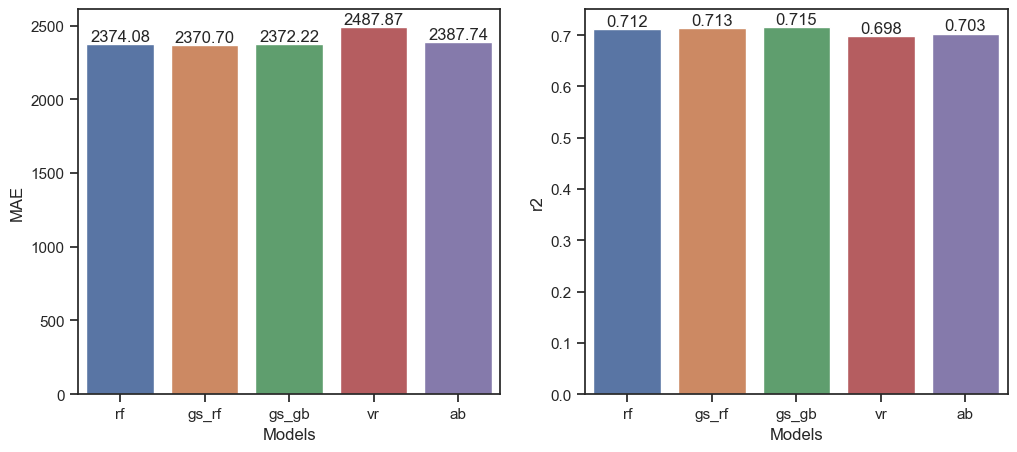

In [124]:
fig, axes = plt.subplots(1,2, sharex=True, figsize=(12,5))
# fig = plt.figure(figsize=(12,10))
pal = sns.color_palette("deep")

re = sns.barplot(data=dataplot, x='Models', y='MAE', ax= axes[0], palette= pal)
re2 = sns.barplot(data=dataplot, x='Models', y='r2', ax= axes[1], palette= pal)
re.bar_label(re.containers[0], fmt='%.2f');
re2.bar_label(re2.containers[0], fmt='%.3f');

<h4> Interesa minimizar el error absoluto (MAE), por lo que el mejor modelo estaría entre los dos del GridSearch, en el caso de random forest tenemos un Mae menor, por otro lado el gradient tiene mayor r2-score... los dos son parecidos pero nos quedaremos con el RandomForest por menor coste y MAE.